In [1]:
!pip install spacy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from convokit import Corpus, Parser,  Transformer, Prominence
import nltk

In [4]:
import convokit

In [6]:
!pwd

/home/nbuser/library/datasets/iq2_corpus


In [7]:
iq2 = convokit.Corpus(filename='iq2_corpus')

In [17]:
from convokit import Parser

In [18]:
annotator = Parser()

In [19]:
iq2_parse = annotator.fit_transform(iq2)

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
#this certainly is necessary#
from convokit import PolitenessStrategies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [15]:
ps = PolitenessStrategies(verbose=100)

In [20]:
iq2_pol = ps.transform(iq2_parse)

Preprocessing comments...
	100
	200
	300
	400
	500
	600
	700
	800
	900
	1000
	1100
	1200
	1300
	1400
	1500
	1600
	1700
	1800
	1900
	2000
	2100
	2200
	2300
	2400
	2500
	2600
	2700
	2800
	2900
	3000
	3100
	3200
	3300
	3400
	3500
	3600
	3700
	3800
	3900
	4000
	4100
	4200
	4300
	4400
	4500
	4600
	4700
	4800
	4900
	5000
	5100
	5200
	5300
	5400
	5500
	5600
	5700
	5800
	5900
	6000
	6100
	6200
	6300
	6400
	6500
	6600
	6700
	6800
	6900
	7000
	7100
	7200
	7300
	7400
	7500
	7600
	7700
	7800
	7900
	8000
	8100
	8200
	8300
	8400
	8500
	8600
	8700
	8800
	8900
	9000
	9100
	9200
	9300
	9400
	9500
	9600
	9700
	9800
	9900
	10000
	10100
	10200
	10300
	10400
	10500
	10600
	10700
	10800
	10900
	11000
	11100
	11200
	11300
	11400
	11500
	11600
	11700
	11800
	11900
	12000
	12100
	12200
	12300
	12400
	12500
	12600
	12700
	12800
	12900
	13000
	13100
	13200
	13300
	13400
	13500
	13600
	13700
	13800
	13900
	14000
	14100
	14200
	14300
	14400
	14500
	14600
	14700
	14800
	14900
	15000
	15100
	15200
	15300
	15400
	155

In [21]:
pro = Prominence()

In [24]:
pro_corpus = pro.transform(iq2)

In [6]:
compl.print_summary_stats()

Number of Users: 471
Number of Utterances: 26562
Number of Conversations: 108


In [148]:
picking_winners =[]
characters = pro_corpus.get_usernames()
for character in characters:
    user1 = pro_corpus.get_user(character)
    utterances = user1.get_utterance_ids()
    record = []
    for item in utterances:
        utterance = user1.get_utterance(item)
        root = utterance.root
        results = pro_corpus.conversations[root].meta['results']
        delta1 = int(results['post']['against']) - int(results['pre']['against'])
        delta2 = int(results['post']['for']) - int(results['pre']['for'])
        if delta1 > delta2:
            win = "against"
        elif delta2 > delta1:
            win = "for"
        else:
            win = "tie or not participating"
        if pro_corpus.get_user(character).meta["stance"] == win:
            record.append("win")
        elif pro_corpus.get_user(character).meta["stance"] != win:
             if pro_corpus.get_user(character).meta["stance"] != None:
                    record.append("loss")
             else:
                record.append("nonparticipating")
    picking_winners.append((character, record[0], len(utterances), list(pro_corpus.get_user(character).meta.values())))

In [149]:
picking_winners

[('Jeffrey Goldberg',
  'win',
  47,
  ['against',
   'Jeffrey Goldberg is a national correspondent for The Atlantic and a columnist for Bloomberg View. He is a recipient of the National Magazine Award for Reporting for his coverage of Islamic terrorism. Before joining The Atlantic in 2007, Goldberg was a Middle East correspondent, and the Washington correspondent, for The New Yorker. Previously, he served as a correspondent for The New York Times Magazine and New York Magazine. He has also written for the Jewish Daily Forward, and was a columnist for The Jerusalem Post. In 2006, Goldberg wrote Prisoners: A Story of Friendship and Terror. In 2001, Goldberg was appointed the Syrkin Fellow in Letters of the Jerusalem Foundation, and in 2002 he became a public policy scholar at the Woodrow Wilson International Center for Scholars in Washington, D.C.',
   'National Correspondent, The Atlantic',
   0.5479999999999999,
   0.8844086021505376,
   0.0,
   0.001769445071907236]),
 ('Alison Van E

**Many Graphs**

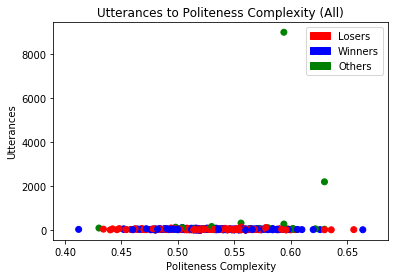

In [219]:
#Politeness Complexity of All*
import matplotlib.patches as mpatches
x = []
y = []
color = []
for entry in picking_winners:
    if entry[1] == 'win':
        color.append('blue')
    elif entry[1] == 'loss':
        color.append('red')
    else:
        color.append('green')
    x.append(entry[3][3])
    y.append(entry[2])
plt.xlabel('Politeness Complexity')
plt.ylabel('Utterances')
plt.title('Utterances to Politeness Complexity (All)')
plt.scatter(x, y, color = color)
red_patch = mpatches.Patch(color='red', label='Losers')
blue_patch = mpatches.Patch(color='blue', label='Winners')
green_patch = mpatches.Patch(color='green', label='Others')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.savefig('fig9.png', dpi=100)
plt.show()

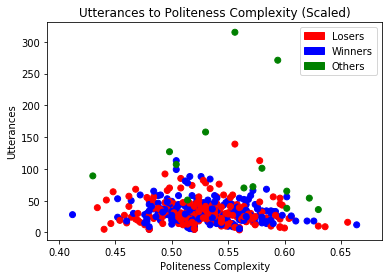

In [227]:
#Politeness Complexity Scaled*
x = []
y = []
color = []
for entry in picking_winners:
    if entry[2] < 2000:
        if entry[1] == 'win':
            color.append('blue')
        elif entry[1] == 'loss':
            color.append('red')
        else:
            color.append('green')
        x.append(entry[3][3])
        y.append(entry[2])
plt.xlabel('Politeness Complexity')
plt.ylabel('Utterances')
plt.title('Utterances to Politeness Complexity (Scaled)')
plt.scatter(x, y, color = color)
red_patch = mpatches.Patch(color='red', label='Losers')
blue_patch = mpatches.Patch(color='blue', label='Winners')
green_patch = mpatches.Patch(color='green', label='Others')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.savefig('fig1.png', dpi=100)
plt.show()

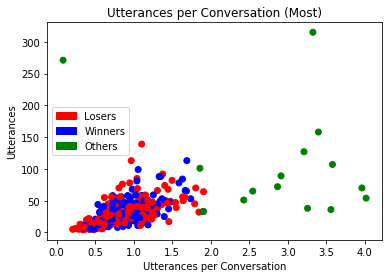

In [229]:
#Utterances per Conversation*
x = []
y = []
color = []
for entry in picking_winners:
    if entry[2] < 2000:
        if entry[1] == 'win':
            color.append('blue')
        elif entry[1] == 'loss':
            color.append('red')
        else:
            color.append('green')
        x.append(entry[3][4])
        y.append(entry[2])
plt.xlabel('Utterances per Conversation')
plt.ylabel('Utterances')
plt.title('Utterances per Conversation (Most)')
plt.scatter(x, y, color = color)
red_patch = mpatches.Patch(color='red', label='Losers')
blue_patch = mpatches.Patch(color='blue', label='Winners')
green_patch = mpatches.Patch(color='green', label='Others')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.savefig('fig21.png', dpi=100)
plt.show()

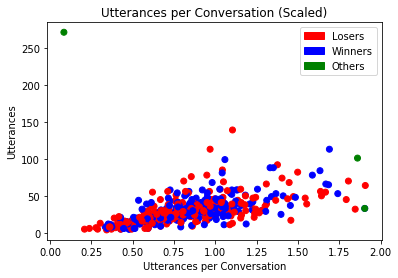

In [221]:
#Utterances per Conversation(scaled)*
x = []
y = []
color = []
for entry in picking_winners:
    if entry[2] < 2000:
        if entry[3][4] <2:
            if entry[1] == 'win':
                color.append('blue')
            elif entry[1] == 'loss':
                color.append('red')
            else:
                color.append('green')
            x.append(entry[3][4])
            y.append(entry[2])
plt.xlabel('Utterances per Conversation')
plt.ylabel('Utterances')
plt.title('Utterances per Conversation (Scaled)')
plt.scatter(x, y, color = color)
red_patch = mpatches.Patch(color='red', label='Losers')
blue_patch = mpatches.Patch(color='blue', label='Winners')
green_patch = mpatches.Patch(color='green', label='Others')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.savefig('fig3.png', dpi=100)
plt.show()

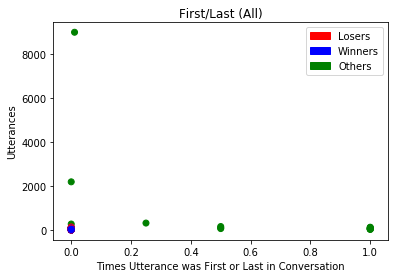

In [222]:
#First_Last of All*
x = []
y = []
color = []
for entry in picking_winners:
    if entry[1] == 'win':
        color.append('blue')
    elif entry[1] == 'loss':
        color.append('red')
    else:
        color.append('green')
    x.append(entry[3][5])
    y.append(entry[2])
plt.xlabel('Times Utterance was First or Last in Conversation')
plt.ylabel('Utterances')
plt.title('First/Last (All)')
plt.scatter(x, y, color = color)
red_patch = mpatches.Patch(color='red', label='Losers')
blue_patch = mpatches.Patch(color='blue', label='Winners')
green_patch = mpatches.Patch(color='green', label='Others')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.savefig('fig4.png', dpi=100)
plt.show()

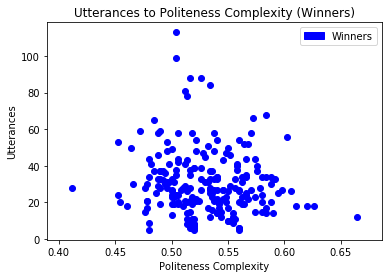

In [230]:
#U2P Win#
x = []
y = []
color = "blue"
for entry in picking_winners:
    if entry[1] == 'win':
        x.append(entry[3][3])
        y.append(entry[2])
plt.xlabel('Politeness Complexity')
plt.ylabel('Utterances')
plt.title('Utterances to Politeness Complexity (Winners)')
plt.scatter(x, y, color = color)
blue_patch = mpatches.Patch(color='blue', label='Winners')
plt.legend(handles = [blue_patch])
plt.savefig('fig5.png', dpi=100)
plt.show()

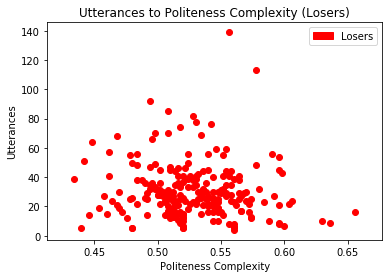

In [224]:
#U2P Loss#
x = []
y = []
color = "red"
for entry in picking_winners:
    if entry[1] == 'loss':
        x.append(entry[3][3])
        y.append(entry[2])
plt.xlabel('Politeness Complexity')
plt.ylabel('Utterances')
plt.title('Utterances to Politeness Complexity (Losers)')
plt.scatter(x, y, color = color)
blue_patch = mpatches.Patch(color='red', label='Losers')
plt.legend(handles = [blue_patch])
plt.savefig('fig6.png', dpi=100)
plt.show()

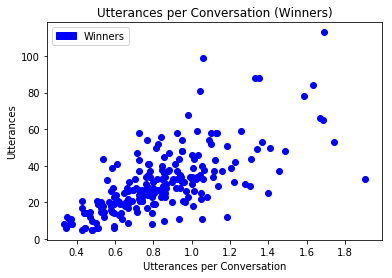

In [225]:
#UPC Win#
x = []
y = []
color = "blue"
for entry in picking_winners:
    if entry[1] == 'win':
        x.append(entry[3][4])
        y.append(entry[2])
plt.xlabel('Utterances per Conversation')
plt.ylabel('Utterances')
plt.title('Utterances per Conversation (Winners)')
plt.scatter(x, y, color = color)
blue_patch = mpatches.Patch(color='blue', label='Winners')
plt.legend(handles = [blue_patch])
plt.savefig('fig7.png', dpi=100)
plt.show()

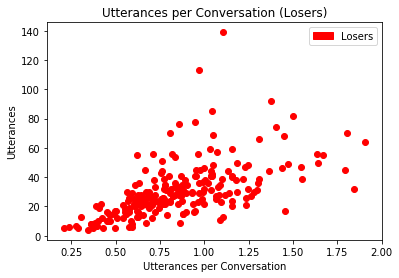

In [226]:
#UPC Loss#
x = []
y = []
color = "red"
for entry in picking_winners:
    if entry[1] == 'loss':
        x.append(entry[3][4])
        y.append(entry[2])
plt.xlabel('Utterances per Conversation')
plt.ylabel('Utterances')
plt.title('Utterances per Conversation (Losers)')
plt.scatter(x, y, color = color)
red_patch = mpatches.Patch(color='red', label='Losers')
plt.legend(handles = [red_patch])
plt.savefig('fig8.png', dpi=100)
plt.show()